In [105]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.ticker import FormatStrFormatter
%matplotlib inline
sns.set(rc={'axes.facecolor':'343435', 'figure.facecolor':'343435'})

In [60]:
distances = pd.read_csv('downloaded_data/807610697_T_DB1B_COUPON.csv')['DISTANCE']

In [61]:
total_flights = 16405000 # Annual, according to FAA
pct_under_500 = len(distances[distances < 500]) / len(distances)
num_under_500 = total_flights * pct_under_500
num_label = "Flights < 500 miles: " + str(round(pct_under_500 * 100, 2)) + "%\n" \
            + " (Estimated " + str(round(num_under_500/(10**6),2)) + str("M / Year)")

C:\Users\Philip Harman\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


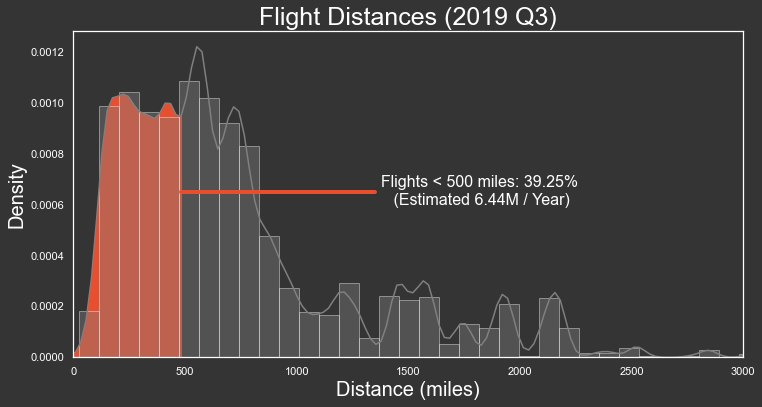

In [122]:
fig, ax = plt.subplots(figsize=(12, 6))
sns.distplot(distances, ax = ax, color = 'grey')

# Fill in < 500 miles, draw line
kde_x, kde_y = ax.lines[0].get_data()
ax.fill_between(kde_x, kde_y, where= kde_x < 500 , interpolate=True, color='#E84F2F')
ax.text(1820 , 0.0006, num_label, ha='center', color = 'white', fontsize = 16)
plt.axhline( y = 0.00065, xmin = 0.16, xmax = 0.45, color='#E84F2F', linewidth=4)

# Labeling and formatting things
ax.set_xlabel('Distance (miles)', fontsize = 20)
ax.set_ylabel('Density', fontsize = 20)
ax.set_title('Flight Distances (2019 Q3)', fontsize = 25, color = 'white')

ax.grid(False)
ax.xaxis.label.set_color('white')
ax.yaxis.label.set_color('white')
ax.tick_params(colors='white', which='both')
plt.xlim([0,3000])

plt.savefig('../writeup_materials/flight_distribution.png')

plt.show()